In [2]:
cd /home/jmuraskin/Projects/CCD/working_v1/seg_probabilities/

/home/jmuraskin/Projects/CCD/working_v1/seg_probabilities


In [34]:
import numpy as np
from nilearn.image import smooth_img,new_img_like,threshold_img

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
result_img = smooth_img("warp_outputs/*_data_/segment_prob_1_to_template/segment_prob_1_to_template.nii.gz",fwhm=6) 

In [24]:
data=result_img.get_data()
gm=np.mean(data,axis=3)
gm=new_img_like(result_img, gm)

In [35]:
from nilearn import plotting

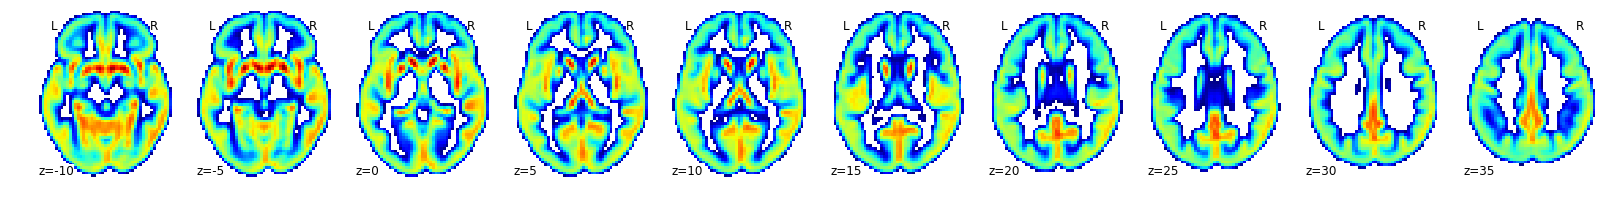

In [40]:
plotting.plot_img(gm,cut_coords=range(-10,40,5),threshold=.10,display_mode='z')

gm.to_filename('grey_matter_mask.nii.gz')



In [43]:
gmThresh=0.2
mask_img=threshold_img('/home/jmuraskin/Projects/CCD/working_v1/seg_probabilities/grey_matter_mask.nii.gz',threshold=gmThresh)
mask_img_data=mask_img.get_data()
mask_img_data[mask_img_data>0]=1
mask_img=new_img_like(mask_img,mask_img_data)
mask_name='/home/jmuraskin/Projects/CCD/working_v1/seg_probabilities/grey_matter_mask-%d-percent.nii.gz' % int(gmThresh*100)
mask_img.to_filename(mask_name)

In [42]:
mask_name

'/home/jmuraskin/Projects/CCD/working_v1/seg_probabilities/grey_matter_mask-20-percent.nii.gz'